## Importing the libraries


In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

##Loading libraries

In [ ]:
test_df = pd.read_csv('test.csv')
train_df = pd.read_csv('train.csv')

##Exploratory Data Analysis

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
train_df.head(9)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [ ]:
total = train_df.isnull().sum().sort_values(ascending=False)
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100
percent_2 = (round(percent_1 , 1)).sort_values(ascending=False)
missing_data = pd.concat([total,percent_2], axis=1 ,keys = ['Total','%'])
missing_data.head(8)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0
Parch,0,0.0
SibSp,0,0.0
Sex,0,0.0


In [ ]:
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

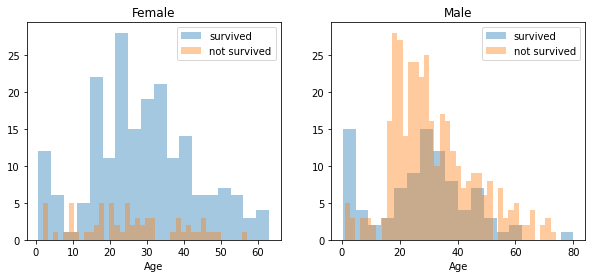

In [ ]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
women = train_df[train_df['Sex']=='female'] 
men = train_df[train_df['Sex' ]=='male']
ax=sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde= False) 
ax=sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label= not_survived, ax = axes[0], kde = False) 
ax.legend()
ax.set_title('Female')
ax=sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label=survived, ax=axes[1], kde = False) 
ax=sns.distplot (men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


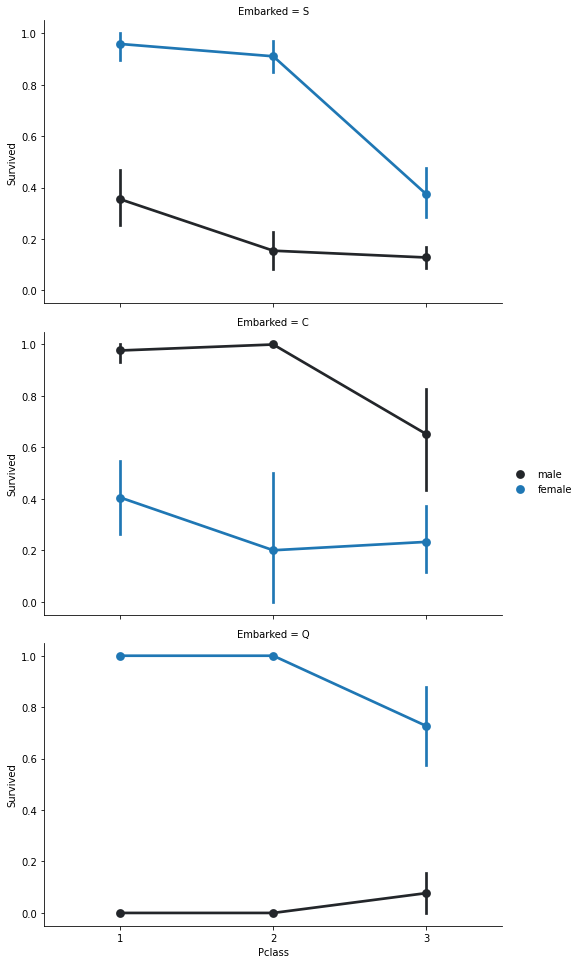

In [ ]:
FacetGrid = sns.FacetGrid(train_df, row='Embarked', size=4.5, aspect=1.6) 
FacetGrid.map (sns.pointplot, 'Pclass', 'Survived', 'Sex', palette = None, order = None, hue_order = None)
FacetGrid.add_legend()

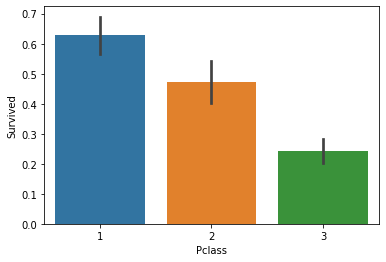

In [ ]:
sns.barplot( x = 'Pclass' , y = 'Survived' ,data=train_df)

In [ ]:
data = [train_df, test_df] 
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0,'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
train_df['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


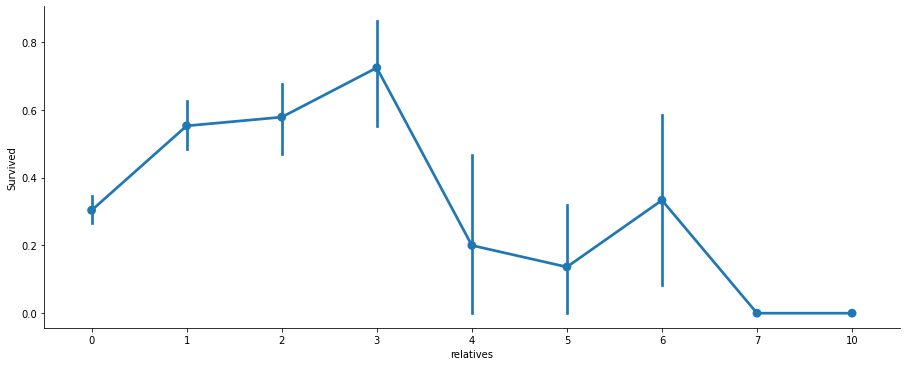

In [ ]:
axes = sns.factorplot('relatives','Survived',
                       data=train_df, aspect = 2.5,)

##Data Preprocessing and Feature Engineering

In [ ]:
train_df = train_df.drop('PassengerId',axis=1)

In [ ]:
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [train_df, test_df]

for dataset in data:
    dataset ['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset ['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset ['Deck'] = dataset['Deck'].map(deck) 
    dataset ['Deck'] = dataset['Deck'].fillna(0)
    dataset ['Deck'] = dataset['Deck'].astype(int)
# we can now drop the cabin feature
train_df = train_df.drop(['Cabin'], axis=1)
test_df = test_df.drop(['Cabin'], axis=1)

In [ ]:
train_df.head(9)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,not_alone,Deck
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,8
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,0,3
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,1,8
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,0,3
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1,8
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q,0,1,8
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,0,1,5
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,4,0,8
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,2,0,8


In [ ]:
data = [train_df, test_df]
for dataset in data:
    mean = train_df["Age"].mean()
    std = test_df["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint (mean - std, mean + std, size = is_null)
    #fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan (age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"]= train_df["Age"].astype(int)
train_df["Age"].isnull().sum()

0

In [ ]:
train_df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [ ]:
common_value = 'S'
data = [train_df , test_df]

for dataset in data:  
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Name       891 non-null    object 
 3   Sex        891 non-null    object 
 4   Age        891 non-null    int64  
 5   SibSp      891 non-null    int64  
 6   Parch      891 non-null    int64  
 7   Ticket     891 non-null    object 
 8   Fare       891 non-null    float64
 9   Embarked   891 non-null    object 
 10  relatives  891 non-null    int64  
 11  not_alone  891 non-null    int64  
 12  Deck       891 non-null    int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 90.6+ KB


In [ ]:
data = [train_df ,test_df]

for dataset in data:
  dataset['Fare'] = dataset['Fare'].fillna(0)
  dataset['Fare'] = dataset['Fare'].astype(int)


In [ ]:
data = [train_df, test_df]
titles = {"Mr": 1, "Miss": 2,"Mrs": 3,"Master": 4 ,"Rare": 5}

for dataset in data:
    # extract titles
    dataset ['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.', expand = False)
    # replace titles with a more common title or as Rare
    dataset ['Title'] = dataset['Title'].replace(['Lady', 'Countess', 'Capt', 'col' ,'Don' ,'Dr',\
                                                  'Major' ,'Rev','Sir','Jonkheer','Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss') 
    dataset['Title'] = dataset['Title'].replace('Ms' , 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme','Mrs') 
    #convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    # filling way with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)
train_df = train_df.drop(['Name'], axis=1)
test_df = test_df.drop(['Name'], axis=1)

In [ ]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,not_alone,Deck,Title
0,0,3,male,22,1,0,A/5 21171,7,S,1,0,8,1.0
1,1,1,female,38,1,0,PC 17599,71,C,1,0,3,3.0
2,1,3,female,26,0,0,STON/O2. 3101282,7,S,0,1,8,2.0
3,1,1,female,35,1,0,113803,53,S,1,0,3,3.0
4,0,3,male,35,0,0,373450,8,S,0,1,8,1.0


In [ ]:
genders = {"male": 0 ,"female" :1}
data = [train_df ,test_df]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [ ]:
train_df['Ticket'].describe( )

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

In [ ]:
train_df = train_df.drop(['Ticket'], axis =1)
test_df = test_df.drop(['Ticket'], axis =1)

In [ ]:
ports = {"S": 0,"C":1, "Q" :2}
data = [train_df , test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

In [ ]:
data = [train_df, test_df] 
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age']
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1 
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

# Let's see how it's distributed
train_df['Age'].value_counts()


4     173
6     162
5     156
3     141
2     125
1     106
9       8
0       7
11      4
8       4
7       3
10      2
Name: Age, dtype: int64

In [ ]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title
0,0,3,0,2,1,0,7,0,1,0,8,1.0
1,1,1,1,5,1,0,71,1,1,0,3,3.0
2,1,3,1,3,0,0,7,0,0,1,8,2.0
3,1,1,1,5,1,0,53,0,1,0,3,3.0
4,0,3,0,5,0,0,8,0,0,1,8,1.0


In [ ]:
data= [train_df, test_df]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset ['Fare'] <= 31), 'Fare'] = 2 
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare'] = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare'] = 4
    dataset.loc[ dataset ['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

In [ ]:
data = [train_df, test_df] 
for dataset in data:
    dataset['Age_Class']= dataset['Age']* dataset['Pclass']

In [ ]:
for dataset in data:
    dataset['Fare_Per_Person'] = dataset['Fare']/(dataset['relatives']+1) 
    dataset['Fare_Per_Person'] = dataset['Fare_Per_Person'].astype(int)

# Let's take a Last Look at the training set, before we start training the models.
train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title,Age_Class,Fare_Per_Person
0,0,3,0,2,1,0,0,0,1,0,8,1.0,6,0
1,1,1,1,5,1,0,3,1,1,0,3,3.0,5,1
2,1,3,1,3,0,0,0,0,0,1,8,2.0,9,0
3,1,1,1,5,1,0,3,0,1,0,3,3.0,5,1
4,0,3,0,5,0,0,1,0,0,1,8,1.0,15,1
5,0,3,0,4,0,0,1,2,0,1,8,1.0,12,1
6,0,1,0,6,0,0,3,0,0,1,5,1.0,6,3
7,0,3,0,2,3,1,2,0,4,0,8,4.0,6,0
8,1,3,1,3,0,2,1,0,2,0,8,3.0,9,0
9,1,2,1,1,1,0,2,1,1,0,8,3.0,2,1


In [ ]:
x_train = train_df.drop("Survived", axis =1)
y_train = train_df["Survived"]
x_test  = test_df.drop("PassengerId", axis =1).copy()

##Modelling

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression() 
logreg.fit(x_train, y_train)

y_pred = logreg.predict(x_test)

acc_log = round(logreg.score(x_train, y_train)*100, 2)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train) 
y_pred = decision_tree.predict(x_test) 
acc_decision_tree = round(decision_tree.score (x_train, y_train)*100, 2)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier (n_estimators=100) 
random_forest.fit(x_train, y_train)

y_prediction = random_forest.predict(x_test)

random_forest.score(x_train, y_train)
acc_random_forest = round(random_forest.score (x_train, y_train)*100, 2)

In [ ]:
from sklearn.svm import LinearSVC
linear_svc = LinearSVC()
linear_svc.fit(x_train , y_train)

y_pred = linear_svc.predict(x_test)

acc_linear_svc = round(linear_svc.score(x_train , y_train)*100 ,2)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
results = pd.DataFrame({
    'Model':['Support Vector Machine', 'Logistic Regression',
             'Random Forest',
             'Decision Tree'],
    'Score': [acc_linear_svc , acc_log,
              acc_random_forest , acc_decision_tree]})     
result_df = results.sort_values(by ='Score' ,ascending =False)
result_df = result_df.set_index('Score')
result_df.head()

,Model
Score,
92.82,Random Forest
92.82,Decision Tree
80.92,Support Vector Machine
80.81,Logistic Regression


In [ ]:
#cross validation
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf ,x_train, y_train,cv=10,scoring ="accuracy")
print("Scores:",scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.78888889 0.84269663 0.7752809  0.83146067 0.88764045 0.79775281
 0.82022472 0.76404494 0.84269663 0.84269663]
Mean: 0.819338327091136
Standard Deviation: 0.03583471198912938


In [ ]:
importances = pd.DataFrame({'feature':x_train.columns,'importance':np.round(random_forest.feature_importances_,3)}) 
importances = importances.sort_values('importance', ascending = False).set_index('feature') 
importances.head (15)

,importance
feature,
Title,0.222
Sex,0.162
Age_Class,0.095
Deck,0.086
Pclass,0.074
Age,0.073
Fare,0.066
relatives,0.059
Embarked,0.049


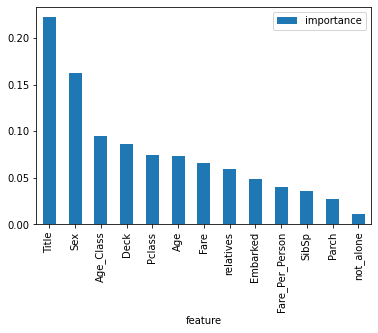

In [ ]:
importances.plot.bar()

In [ ]:
#hyperparameter tuning
# Random Forest
random_forest = RandomForestClassifier(criterion = "gini",
                                       min_samples_leaf = 1, 
                                       min_samples_split = 10, 
                                       n_estimators=100, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

random_forest.fit(x_train, y_train)
y_prediction = random_forest.predict(x_test)

random_forest.score(x_train, y_train)

print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 82.49 %


In [ ]:
from sklearn.model_selection import cross_val_predict 
from sklearn.metrics import confusion_matrix 
predictions = cross_val_predict(logreg, x_train, y_train, cv=3)
confusion_matrix(y_train, predictions)

array([[454,  95],
       [ 94, 248]])

In [ ]:
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(y_train, predictions))
print("Recall:", recall_score(y_train, predictions))

Precision: 0.7230320699708455
Recall: 0.7251461988304093


In [ ]:
from sklearn.metrics import f1_score 
f1_score(y_train, predictions)

0.7240875912408758

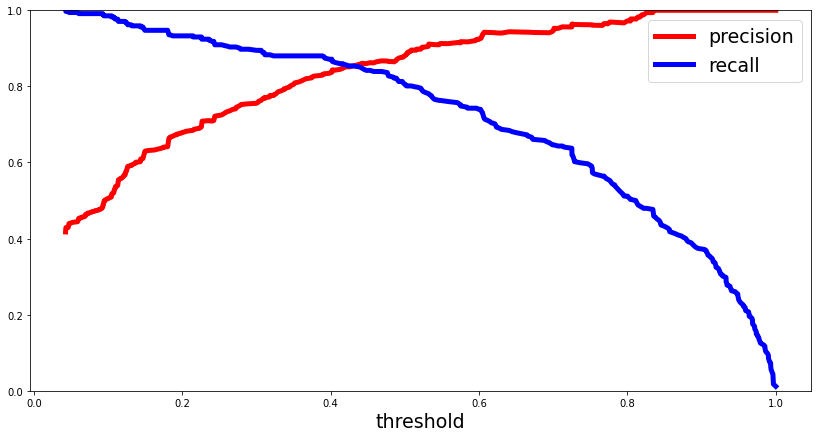

In [ ]:
from sklearn.metrics import precision_recall_curve
# getting the probabilities of our predictions
y_scores = random_forest.predict_proba(x_train)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(y_train, y_scores)
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5) 
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("threshold", fontsize=19)
    plt.legend (loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=(14, 7))
plot_precision_and_recall (precision, recall, threshold) 
plt.show()

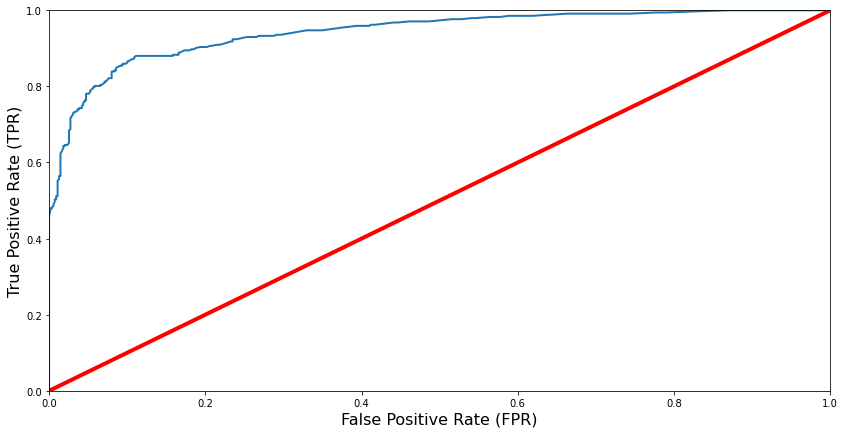

In [ ]:
from sklearn.metrics import roc_curve
# compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_scores)
#plotting them against each other
def plot_roc_curve (false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16) 
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(14, 7)) 
plot_roc_curve(false_positive_rate, true_positive_rate) 
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(y_train , y_scores)
print("ROC-AUC-Score:",r_a_score)

ROC-AUC-Score: 0.9421968704396084
